In [4]:
#Impresión de JSON resultado de la solicitud a la API
import requests
from textblob import TextBlob

def get_reviews(asin, page=1):
    url = "https://real-time-amazon-data.p.rapidapi.com/product-reviews"
    querystring = {
        "asin": asin,
        "country": "US",
        "sort_by": "TOP_REVIEWS",
        "star_rating": "ALL",
        "verified_purchases_only": "false",
        "images_or_videos_only": "false",
        "current_format_only": "false",
        "page": page
    }

    headers = {
        "x-rapidapi-key": "38e65580ffmsh55d6f1788db421ap1ff5b0jsn3f9029414f2f",
        "x-rapidapi-host": "real-time-amazon-data.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)
    return response.json()


get_reviews("B0CN1QSH8Q", 1)

{'status': 'OK',
 'request_id': '821d7cc1-44b5-4fb1-98cc-23572de07b48',
 'parameters': {'asin': 'B0CN1QSH8Q',
  'country': 'US',
  'sort_by': 'TOP_REVIEWS',
  'verified_purchases_only': False,
  'images_or_videos_only': False,
  'current_format_only': False,
  'star_rating': 'ALL',
  'page': 1},
 'data': {'asin': 'B0CN1QSH8Q',
  'total_reviews': 126,
  'total_ratings': 346,
  'country': 'US',
  'domain': 'www.amazon.com',
  'reviews': [{'review_id': 'R3V8NZHF81VLKG',
    'review_title': 'Great phone!',
    'review_comment': "This is a very nice phone. Samsung did a really good job on this one.\n\nThe build quality is solid. The plastic case is a matte iridescent deep blackish blue and does a good job at not showing fingerprints. The AMOLED screen has good colors and perfect deep blacks. The high capacity battery (5,000mAh) lasts 7-10 days with light usage before needing to recharge. The software is typical Samsung high-quality and the Samsung-built email app is still the best amongst A

In [6]:
#Análisis de sentimeintos de TextBlob

from textblob import TextBlob

# Texto a analizar
text = """
This is a very nice phone. Samsung did a really good job on this one.

The build quality is solid. The plastic case is a matte iridescent deep blackish blue and does a good job at not showing fingerprints. The AMOLED screen has good colors and perfect deep blacks. The high capacity battery (5,000mAh) lasts 7-10 days with light usage before needing to recharge. The software is typical Samsung high-quality and the Samsung-built email app is still the best amongst Android phones. The fingerprint reader on the side unlocks the phone instantaneously. The charging port is USB-C. Speed-wise, the phone is plenty fast and doesn't lag. It has 5G cell phone connectivity but you can turn it off and use 4G to save on battery life. Networking also supports 2G (i.e. GSM) that can be turned on or off. Built-in storage is a whopping 128GB. Expansion-wise, the SIM tray accepts 2 SIM cards (i.e. this is indeed a dual-SIM phone), or 1 SIM card + 1 Micro-SD card. There is a headphone jack at the bottom, next to the charging port. The phone is quite big, i.e. the screen is huge, and it's rather heavy but so are most phones nowadays. It barely fits in my pants pockets.

This is marketed as an entry-level phone, but honestly, it has such much memory, long battery life, fingerprint unlock, 3 good cameras, dual-SIM, Micro-SD expansion, headphone jack, USB C, great software support, future-proof updates, and is quite fast, so you may wonder why you'd ever need to buy anything more expensive.

Overall, great modern phone at a reasonable price ($200) that should work well for most people and last a long time.
"""

# Crear un objeto TextBlob
blob = TextBlob(text)

# Analizar el sentimiento
sentiment = blob.sentiment

# Mostrar resultados
print(f"Polarity: {sentiment.polarity}")
print(f"Subjectivity: {sentiment.subjectivity}")


Polarity: 0.2867592592592592
Subjectivity: 0.4807407407407407


In [1]:
#Análisis de sentimientos con TextBlob

import requests
from textblob import TextBlob

def get_reviews(asin, page=1):
    url = "https://real-time-amazon-data.p.rapidapi.com/product-reviews"
    querystring = {
        "asin": asin,
        "country": "US",
        "sort_by": "TOP_REVIEWS",
        "star_rating": "ALL",
        "verified_purchases_only": "false",
        "images_or_videos_only": "false",
        "current_format_only": "false",
        "page": page
    }

    headers = {
        "x-rapidapi-key": "38e65580ffmsh55d6f1788db421ap1ff5b0jsn3f9029414f2f",
        "x-rapidapi-host": "real-time-amazon-data.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)
    return response.json()

def analyze_sentiments(reviews):
    sentiments = []
    for review in reviews['data']['reviews']:
        analysis = TextBlob(review['review_comment'])
        sentiments.append(analysis.sentiment.polarity)
    if sentiments:
        avg_sentiment = sum(sentiments) / len(sentiments)
        return avg_sentiment
    else:
        return None

asin = "B0CN1QSH8Q"
reviews = get_reviews(asin)
avg_sentiment = analyze_sentiments(reviews)

print(f"El promedio de los sentimientos de los comentarios para el producto {asin} es: {avg_sentiment:.2f}")


El promedio de los sentimientos de los comentarios para el producto B0CN1QSH8Q es: 0.17


La calificación promedio de los sentimientos de los comentarios para el producto B0CN1QSH8Q es: 3.43


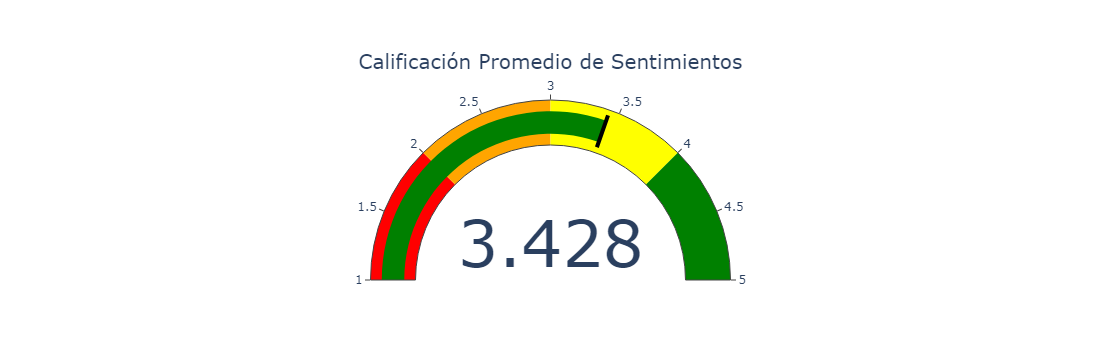

In [5]:
#Graficado en un Gauge meter y reconvertido para analizar todas las páginas de comentarios

import requests
from textblob import TextBlob
import plotly.graph_objects as go

def get_reviews(asin):
    reviews = []
    page = 1
    while True:
        url = "https://real-time-amazon-data.p.rapidapi.com/product-reviews"
        querystring = {
            "asin": asin,
            "country": "US",
            "sort_by": "TOP_REVIEWS",
            "star_rating": "ALL",
            "verified_purchases_only": "false",
            "images_or_videos_only": "false",
            "current_format_only": "false",
            "page": page
        }

        headers = {
            "x-rapidapi-key": "38e65580ffmsh55d6f1788db421ap1ff5b0jsn3f9029414f2f",
            "x-rapidapi-host": "real-time-amazon-data.p.rapidapi.com"
        }

        response = requests.get(url, headers=headers, params=querystring)
        data = response.json()
        
        if 'data' in data and 'reviews' in data['data']:
            reviews_on_page = data['data']['reviews']
            if not reviews_on_page:
                break
            reviews.extend(reviews_on_page)
        else:
            break  # Stop if there are no more reviews or if the data format is unexpected
        
        page += 1
    return reviews

def analyze_sentiments(reviews):
    sentiments = []
    for review in reviews:
        analysis = TextBlob(review['review_comment'])
        sentiments.append(analysis.sentiment.polarity)
    if sentiments:
        avg_sentiment = sum(sentiments) / len(sentiments)
        return avg_sentiment
    else:
        return None

def sentiment_to_rating(avg_sentiment):
    return 1 + (avg_sentiment + 1) * 2

def create_gauge_meter(rating):
    fig = go.Figure(go.Indicator(
        mode = "gauge+number",
        value = rating,
        title = {'text': "Calificación Promedio de Sentimientos"},
        gauge = {
            'axis': {'range': [1, 5]},
            'steps' : [
                {'range': [1, 2], 'color': "red"},
                {'range': [2, 3], 'color': "orange"},
                {'range': [3, 4], 'color': "yellow"},
                {'range': [4, 5], 'color': "green"}
            ],
            'threshold' : {
                'line': {'color': "black", 'width': 4},
                'thickness': 0.75,
                'value': rating
            }
        }
    ))

    fig.show()

asin = "B0CN1QSH8Q"
reviews = get_reviews(asin)
avg_sentiment = analyze_sentiments(reviews)

if avg_sentiment is not None:
    rating = sentiment_to_rating(avg_sentiment)
    print(f"La calificación promedio de los sentimientos de los comentarios para el producto {asin} es: {rating:.2f}")
    create_gauge_meter(rating)
else:
    print("No se encontraron sentimientos en los comentarios.")


In [10]:
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
from nltk.tokenize import word_tokenize

# Asegúrate de haber descargado el archivo 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt' y coloca la ruta correcta aquí
nrc_lexicon_file = 'C://Users//USUARIO//Desktop//NRC-Emotion-Lexicon//NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

def load_nrc_lexicon(file_path):
    nrc_lexicon = defaultdict(list)
    with open(file_path, 'r') as f:
        for line in f:
            word, emotion, association = line.strip().split('\t')
            if int(association) == 1:
                nrc_lexicon[emotion].append(word)
    return nrc_lexicon

def analyze_emotions(text, lexicon):
    emotions = defaultdict(int)
    words = word_tokenize(text.lower())
    for word in words:
        for emotion, words in lexicon.items():
            if word in words:
                emotions[emotion] += 1
    return emotions

def plot_emotions(emotions):
    categories = list(emotions.keys())
    values = list(emotions.values())

    plt.figure(figsize=(10, 5))
    bars = plt.bar(categories, values, color=['green', 'cyan', 'yellow', 'orange', 'red'])
    
    for bar, emotion in zip(bars, emotions):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(emotion), ha='center', color='black')
    
    plt.xlabel('Emociones')
    plt.ylabel('Frecuencia')
    plt.title('Análisis de Emociones')
    plt.show()

# Carga del lexicon
nrc_lexicon = load_nrc_lexicon(nrc_lexicon_file)

# Ejemplo de texto
text = "Estoy muy feliz y emocionado, pero también algo nervioso y preocupado."

# Análisis de emociones
emotions = analyze_emotions(text, nrc_lexicon)

# Mostrar gráfico de emociones
plot_emotions(emotions)


FileNotFoundError: [Errno 2] No such file or directory: 'C://Users//USUARIO//Desktop//NRC-Emotion-Lexicon//NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'